# 5Problem Statement1: Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:
1.Create a seperateDataFrame with only numeric data by remove the "country"column 
2.Scale the data using the Standard Scaler to create a scaled DataFrame
3.Plotting dendograms with the complete linkage method
4.Creating cluster labels using cut tree
5.Perform the 4-Component PCA on DataFrame
6.Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.decomposition import PCA


In [2]:
  # Load the dataset
df = pd.read_csv("C:/Users/Kalpesh__K__/Downloads/assignment_5 datasets_qde_d8wik4t/Assignment 5 Datasets/Country-data.csv")


In [3]:
df.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

In [4]:
# Create a separate DataFrame with only numeric data
df_numeric = df.drop(["country"], axis=1)


In [5]:
# Scale the data using Standard Scaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


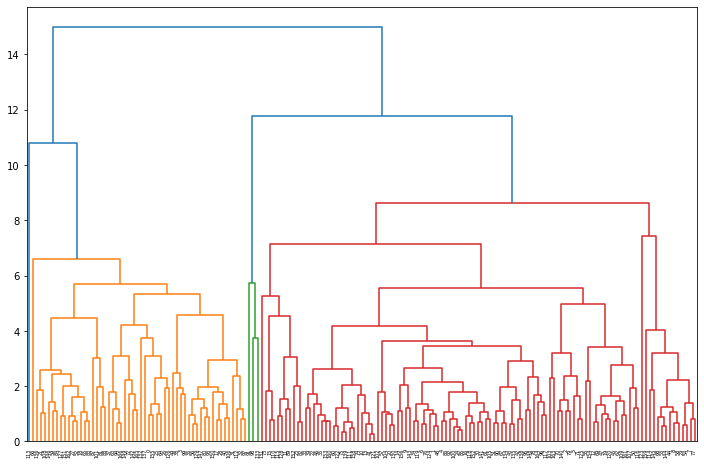

In [6]:
# Plotting dendograms with the complete linkage method
plt.figure(figsize=(12,8))
linkage_matrix = linkage(df_scaled, method='complete', metric='euclidean')
dendrogram(linkage_matrix)
plt.show()


In [7]:
# Creating cluster labels using cut tree
labels = cut_tree(linkage_matrix, n_clusters=5)


In [8]:
# Add the cluster labels to the original DataFrame
df_labeled = pd.concat([df, pd.DataFrame(labels, columns=["cluster"])], axis=1)


In [9]:
# Perform 4-Component PCA on DataFrame
pca = PCA(n_components=4)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=["PC1", "PC2", "PC3", "PC4"])


In [10]:
# Add the PCA components to the labeled DataFrame
df_labeled_pca = pd.concat([df_labeled, df_pca], axis=1)


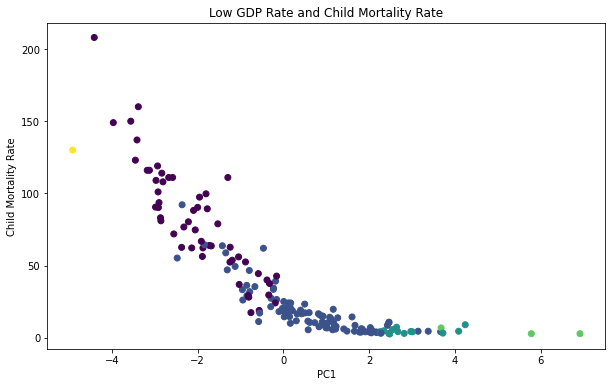

In [11]:
# Analyze how low GDP rate corresponds to the child mortality rate around the world
plt.figure(figsize=(10,6))
plt.scatter(df_labeled_pca["PC1"], df_labeled_pca["child_mort"], c=df_labeled_pca["cluster"], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("Child Mortality Rate")
plt.title("Low GDP Rate and Child Mortality Rate")
plt.show()


# Problem Statement2:Write a Python program that reads the “Credit Card Customer Data.csv”(provided on LMS) The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.




In [66]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns 


In [67]:
# load the CSV file into a DataFrame
df = pd.read_csv("C:/Users/Kalpesh__K__/Downloads/assignment_5 datasets_qde_d8wik4t/Assignment 5 Datasets/Credit Card Customer Data.csv")


In [68]:
df.head

<bound method NDFrame.head of      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10      

In [69]:
df.isnull().dropna()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
655,False,False,False,False,False,False,False
656,False,False,False,False,False,False,False
657,False,False,False,False,False,False,False
658,False,False,False,False,False,False,False


In [70]:
print(df.columns)

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [71]:
# Find missing values and drop unnecessary columns
print("Number of rows with missing values: ", df.isnull().sum().sum())
df.dropna(inplace=True)
df.drop(['Customer Key'], axis=1, inplace=True)


Number of rows with missing values:  0


In [72]:
print(df.columns)

Index(['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')


KeyError: 'Attrition_Flag'

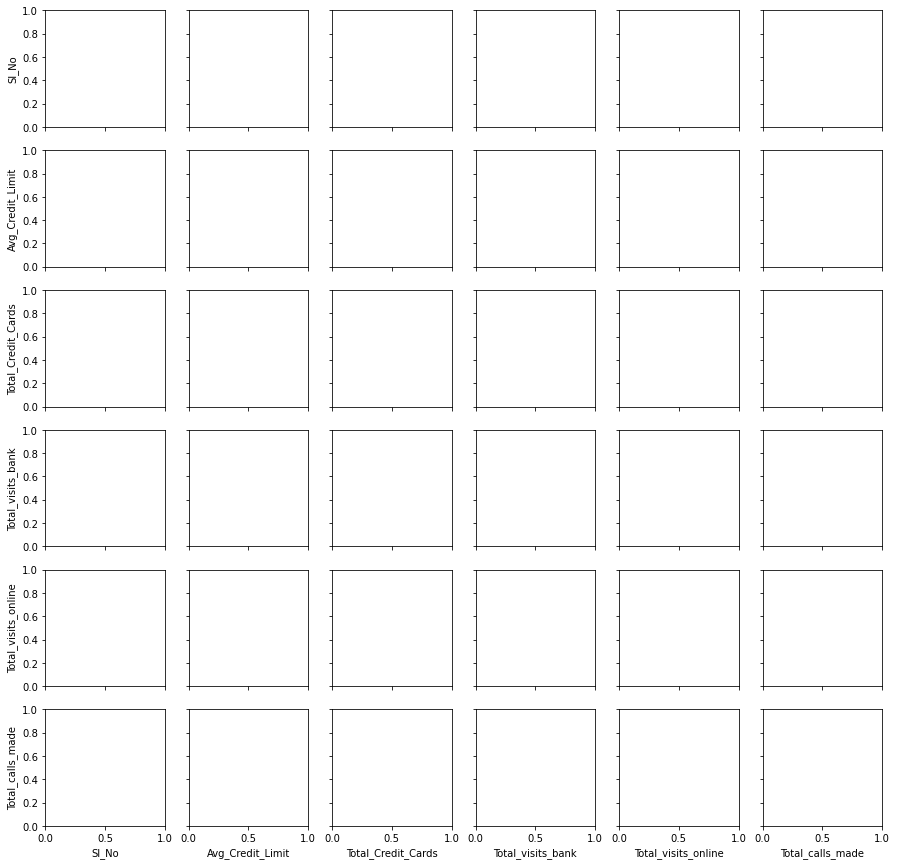

In [73]:
# Perform univariate and bivariate analysis
sns.pairplot(df, hue='Attrition_Flag')
plt.show()


In [77]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)


[[-1.72942847  1.74018685 -1.24922476 -0.86045063 -0.54748969 -1.25153737]
 [-1.72417983  0.41029254 -0.78758515 -1.47373077  2.5205186   1.89185881]
 [-1.71893118  0.41029254  1.05897329 -0.86045063  0.13428993  0.1455276 ]
 ...
 [ 1.71893118  2.93709172  1.5206129  -0.86045063  2.17962879 -0.90227113]
 [ 1.72417983  3.65523464  2.44389211 -0.86045063  4.22496765 -1.25153737]
 [ 1.72942847  3.52224521  1.9822525  -1.47373077  3.20229822 -0.55300488]]


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


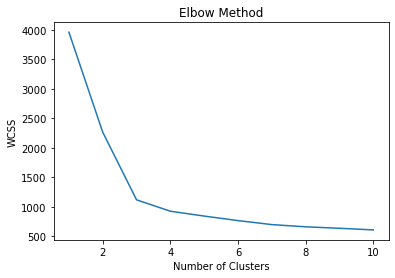

In [78]:
# Find the within-cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [79]:
# Step 5: Find the within-cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


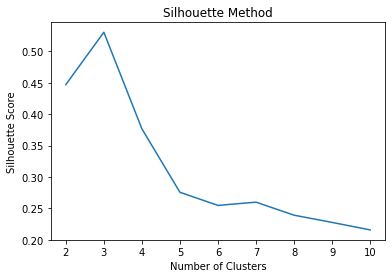

In [80]:
# Find silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels, metric='euclidean'))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Step 6: Find silhouette score
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    sil.append(silhouette_score(df, kmeans.labels_))


In [81]:
# Choose the best size for the cluster and build the final model
num_clusters = int(input("Enter the number of clusters: "))
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters


Enter the number of clusters: 10


In [82]:
# Output the data segmented by cluster
for cluster in range(num_clusters):
    print("Cluster ", cluster)
    print(df[df['Cluster'] == cluster].describe())



Cluster  0
            Sl_No  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count   75.000000         75.000000           75.000000          75.000000   
mean   513.293333      49000.000000            5.813333           4.626667   
std     60.837349      14737.339963            1.147186           0.486947   
min    402.000000      26000.000000            4.000000           4.000000   
25%    460.500000      38000.000000            5.000000           4.000000   
50%    519.000000      46000.000000            6.000000           5.000000   
75%    564.000000      62500.000000            7.000000           5.000000   
max    612.000000      74000.000000            7.000000           5.000000   

       Total_visits_online  Total_calls_made  Cluster  
count            75.000000         75.000000     75.0  
mean              0.840000          2.466667      0.0  
std               0.870539          1.255618      0.0  
min               0.000000          0.000000      0.0  
25%   

            Sl_No  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count   74.000000         74.000000           74.000000          74.000000   
mean   493.810811      52013.513514            5.662162           2.432432   
std     61.831338      14062.963350            1.088886           0.498795   
min    399.000000      26000.000000            4.000000           2.000000   
25%    439.500000      38500.000000            5.000000           2.000000   
50%    495.000000      52000.000000            6.000000           2.000000   
75%    537.000000      64750.000000            7.000000           3.000000   
max    607.000000      75000.000000            7.000000           3.000000   

       Total_visits_online  Total_calls_made  Cluster  
count            74.000000         74.000000     74.0  
mean              0.918919          2.972973      7.0  
std               0.840038          0.859643      0.0  
min               0.000000          1.000000      7.0  
25%              

In [83]:
# Print co-ordinates of all centroids and silhouette scores for the final model
centroids = kmeans.cluster_centers_
for i in range(num_clusters):
    print("Centroid ", i, ": ", centroids[i])
     
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_data, labels)
print("Silhouette score for the final model: ", silhouette_avg)


Centroid  0 :  [ 0.95941728  0.38369466  0.51116095  1.36371203 -0.60203206 -0.39001397]
Centroid  1 :  [-1.07841959 -0.58279482 -1.07805502 -0.94314009  0.39474506  1.86831277]
Centroid  2 :  [ 1.48173281  2.66497488  1.84020955 -1.04915221  2.03540617 -0.86197117]
Centroid  3 :  [-0.09600406 -0.59896571  0.3081748   1.32309626 -0.51752136 -0.59522388]
Centroid  4 :  [ 0.93099826  0.39256062  0.20563946  0.47761514 -0.50616972 -1.06102851]
Centroid  5 :  [-1.17263473 -0.60855426 -1.46080958 -0.88600397  0.28106193  0.67427788]
Centroid  6 :  [-0.08592974 -0.58201321  0.40202461  0.05160702 -0.57371199 -0.55300488]
Centroid  7 :  [ 0.85716044  0.46384775  0.44137435  0.01803174 -0.57512941 -0.21317827]
Centroid  8 :  [ 1.60254819  3.06776829  1.96218122 -1.15375852  3.72104358 -0.90227113]
Centroid  9 :  [-1.15708761 -0.50411054 -0.54277627 -0.87903488  0.28923984  0.61650784]
Silhouette score for the final model:  0.2156277506952382


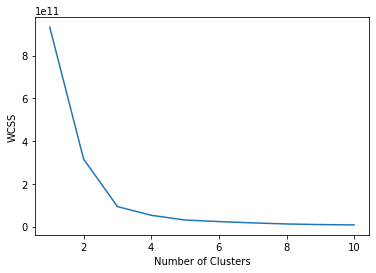

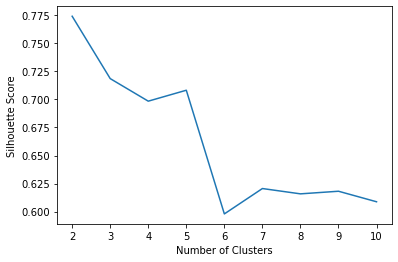

Coordinates of all centroids:
 [[4.94984211e+02 5.70315789e+04 5.73157895e+00 3.21052632e+00
  1.56842105e+00 2.05263158e+00 3.72105263e+00]
 [6.36205128e+02 1.54205128e+05 8.74358974e+00 5.89743590e-01
  1.08717949e+01 1.00000000e+00 5.07692308e+00]
 [2.30327146e+02 1.38491879e+04 3.88863109e+00 2.21113689e+00
  2.31554524e+00 4.49187935e+00 4.40139211e+00]]
Silhouette score for the final model: 0.7185518343349878


In [84]:
# Step 7: Use a line plot to find the best number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2,11), sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 8: Build the final model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Step 9: Print the coordinates of all centroids and the silhouette score for the final model
print("Coordinates of all centroids:\n", kmeans.cluster_centers_)
print("Silhouette score for the final model:", silhouette_score(df, kmeans.labels_))


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


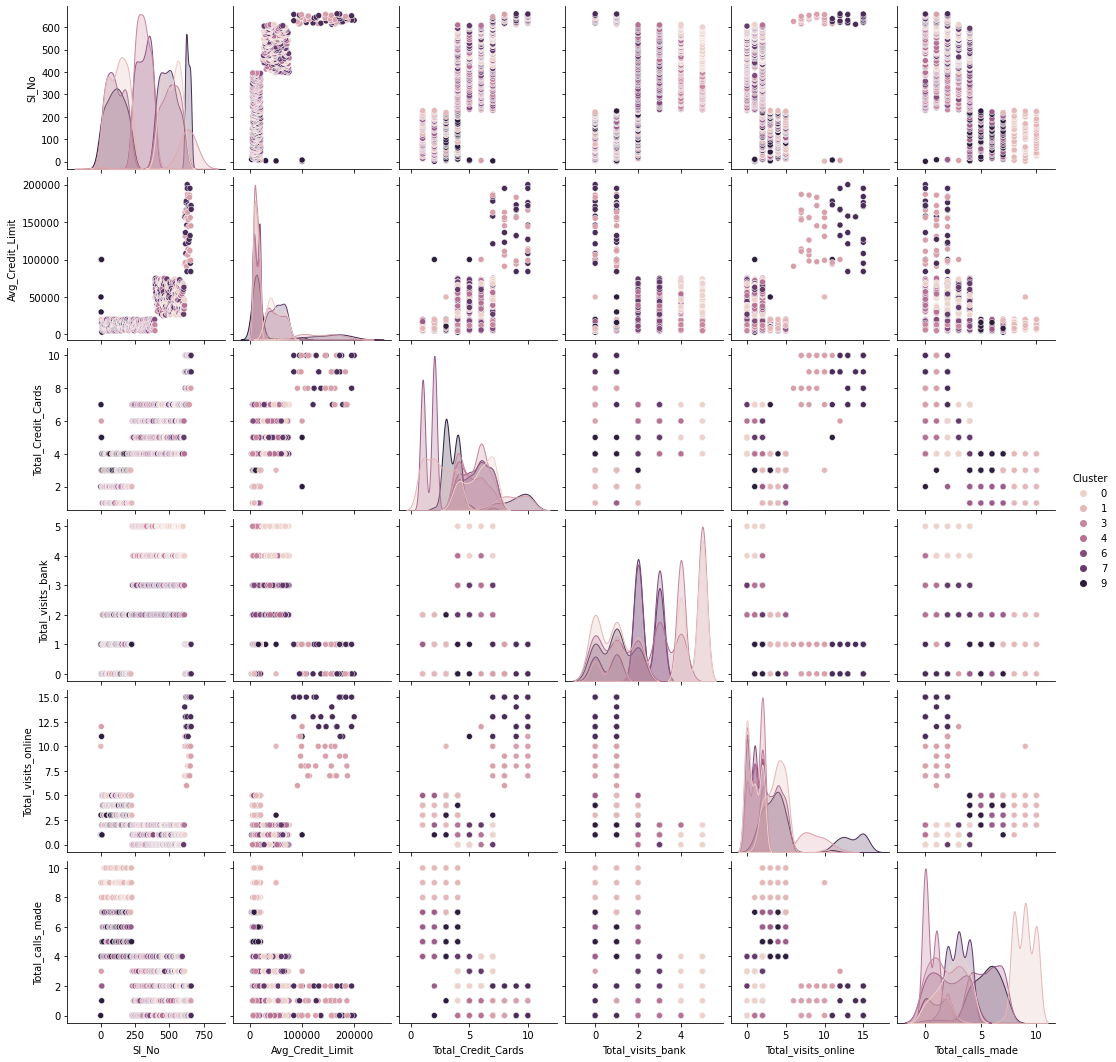

In [85]:
sns.pairplot(data=df,hue='Cluster')
plt.show()


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


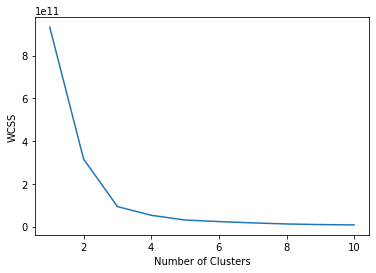

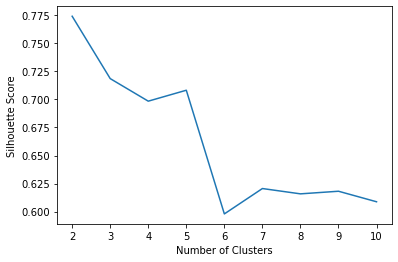

Coordinates of all centroids:
 [[4.94984211e+02 5.70315789e+04 5.73157895e+00 3.21052632e+00
  1.56842105e+00 2.05263158e+00]
 [6.36205128e+02 1.54205128e+05 8.74358974e+00 5.89743590e-01
  1.08717949e+01 1.00000000e+00]
 [2.30327146e+02 1.38491879e+04 3.88863109e+00 2.21113689e+00
  2.31554524e+00 4.49187935e+00]]
Silhouette score for the final model: 0.7185520311153457


In [76]:
import pandas as pd
from sklearn.cluster import KMeans

# Step 5: Find the within-cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Step 6: Find silhouette score
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    sil.append(silhouette_score(df, kmeans.labels_))
    
# Step 7: Use a line plot to find the best number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2,11), sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 8: Build the final model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Step 9: Print the coordinates of all centroids and the silhouette score for the final model
print("Coordinates of all centroids:\n", kmeans.cluster_centers_)
print("Silhouette score for the final model:", silhouette_score(df, kmeans.labels_))


# scoresProblem Statement 3: DBSCAN ClusteringLoad the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:
.Find the correlation among the all the columns and drop the column/s with the least correlation2.Encode the "Gender" column using get_dummies() function3.Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=44.Print the size of each cluster and also the size of outliers' cluster5.Using a scatter plot shows how annual income corresponds to the spending rates of customers

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [3]:
# Load the dataset into a DataFrame
df = pd.read_csv("C:/Users/Kalpesh__K__/Downloads/assignment_5 datasets_qde_d8wik4t (1)/Assignment 5 Datasets/Mall_Customers.csv")
 

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
corr_matrix = df.corr()
print(corr_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [7]:
# Encode the "Gender" column using get_dummies()
df = pd.get_dummies(df, columns=["Gender"])
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,64,19,3,0,1
9,10,30,19,72,1,0


In [8]:
# Perform DBSCAN clustering with eps=12.5 and min_samples=4
dbscan = DBSCAN(eps=12.5, min_samples=4)
labels = dbscan.fit_predict(df)


In [9]:
# Print the size of each cluster and the size of outliers' cluster
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)
if -1 in cluster_sizes.index:
    print(f"Outliers' cluster size: {cluster_sizes[-1]}")


Cluster sizes:
-1    68
 0    25
 1     4
 2    61
 3     3
 4    21
 5     4
 6     4
 7    10
dtype: int64
Outliers' cluster size: 68


In [10]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

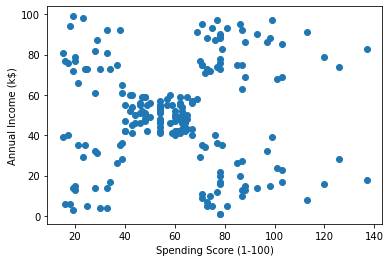

In [14]:
# Scatter plot of annual income vs spending score
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()


# 8Problem Statement4:Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.

In [53]:
!pip install mlxtend


In [54]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder


In [55]:
df = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_5 datasets_qde_d8wik4t (1)/Assignment 5 Datasets/Groceries data.csv')


In [56]:
df.head(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
5,4941,2015-02-14,rolls/buns,2015,2,14,5
6,4501,2015-08-05,other vegetables,2015,8,5,2
7,3803,2015-12-23,pot plants,2015,12,23,2
8,2762,2015-03-20,whole milk,2015,3,20,4
9,4119,2015-12-02,tropical fruit,2015,12,2,2


In [57]:
print(df.columns
     )

Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')


In [58]:
# Step 3: Print customer data where the member number is 1001
member_data = df[df['Member_number'] == 1001]
print(member_data)



       Member_number        Date     itemDescription  year  month  day  \
364             1001  2015-01-20         frankfurter  2015      1   20   
5695            1001  2015-02-05         frankfurter  2015      2    5   
6612            1001  2015-04-14                beef  2015      4   14   
9391            1001  2014-07-02             sausage  2014      7    2   
11046           1001  2014-12-12          whole milk  2014     12   12   
16513           1001  2015-01-20                soda  2015      1   20   
21844           1001  2015-02-05                curd  2015      2    5   
22761           1001  2015-04-14         white bread  2015      4   14   
25540           1001  2014-07-02          whole milk  2014      7    2   
27195           1001  2014-12-12                soda  2014     12   12   
32575           1001  2015-01-20  whipped/sour cream  2015      1   20   
32727           1001  2014-07-02          rolls/buns  2014      7    2   

       day_of_week  
364             

In [59]:
# Step 4: Create a new column as “item count”, and give the count as 1 (because all customers bought 1 item on each day only)
df['item count'] = 1


In [60]:
df.columns

Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week', 'item count'],
      dtype='object')

In [61]:
# Step 5: Drop unnecessary columns like "month","day","year","day_of_week"
df = df.drop(columns=['month', 'day', 'year', 'day_of_week'])


In [95]:
df.columns

Index(['Member_number', 'itemDescription', 'item count'], dtype='object')

In [96]:
# Step 6: Create a new data frame where all data is grouped by member id and items they bought and set their value as item count
grouped_data = df.groupby(['Member_number', 'itemDescription'])['item count'].sum().reset_index()
print(
grouped_data)

       Member_number      itemDescription  item count
0               1000          canned beer           1
1               1000     hygiene articles           1
2               1000      misc. beverages           1
3               1000               pastry           1
4               1000   pickled vegetables           1
...              ...                  ...         ...
34761           5000               onions           1
34762           5000     other vegetables           1
34763           5000      root vegetables           1
34764           5000  semi-finished bread           1
34765           5000                 soda           1

[34766 rows x 3 columns]


In [97]:
df.dtypes

Member_number       int64
itemDescription    object
item count          int64
dtype: object

In [98]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [99]:
df = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_5 datasets_qde_d8wik4t (1)/Assignment 5 Datasets/Groceries data.csv')


In [100]:
# Task 3: Print customer data where the member number is 1001
print(df[df['Member_number'] == 1001])


       Member_number        Date     itemDescription  year  month  day  \
364             1001  2015-01-20         frankfurter  2015      1   20   
5695            1001  2015-02-05         frankfurter  2015      2    5   
6612            1001  2015-04-14                beef  2015      4   14   
9391            1001  2014-07-02             sausage  2014      7    2   
11046           1001  2014-12-12          whole milk  2014     12   12   
16513           1001  2015-01-20                soda  2015      1   20   
21844           1001  2015-02-05                curd  2015      2    5   
22761           1001  2015-04-14         white bread  2015      4   14   
25540           1001  2014-07-02          whole milk  2014      7    2   
27195           1001  2014-12-12                soda  2014     12   12   
32575           1001  2015-01-20  whipped/sour cream  2015      1   20   
32727           1001  2014-07-02          rolls/buns  2014      7    2   

       day_of_week  
364             

In [101]:
# Task 4: Create a new column as "item count", and give the count as 1
df["item count"] = 1


In [102]:
# Task 5: Drop unnecessary columns
df.drop(["Date", "month", "year", "day_of_week"], axis=1, inplace=True)
df.head(20)

,Member_number,itemDescription,day,item count
0,1808,tropical fruit,21,1
1,2552,whole milk,1,1
2,2300,pip fruit,19,1
3,1187,other vegetables,12,1
4,3037,whole milk,2,1
5,4941,rolls/buns,14,1
6,4501,other vegetables,5,1
7,3803,pot plants,23,1
8,2762,whole milk,20,1
9,4119,tropical fruit,2,1


In [103]:
# Task 6: Group by member id and items they bought and set their value as item count
df = df.groupby(["Member_number", "itemDescription"])["item count"].sum().reset_index()
df.head()

,Member_number,itemDescription,item count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1


In [104]:
df.isnull

<bound method DataFrame.isnull of        Member_number      itemDescription  item count
0               1000          canned beer           1
1               1000     hygiene articles           1
2               1000      misc. beverages           1
3               1000               pastry           1
4               1000   pickled vegetables           1
...              ...                  ...         ...
34761           5000               onions           1
34762           5000     other vegetables           1
34763           5000      root vegetables           1
34764           5000  semi-finished bread           1
34765           5000                 soda           1

[34766 rows x 3 columns]>

In [105]:
df.dtypes

Member_number       int64
itemDescription    object
item count          int64
dtype: object

In [106]:
df.columns

Index(['Member_number', 'itemDescription', 'item count'], dtype='object')

In [ ]:
transactions = df['itemDescription','Member_number','item count'].apply(lambda x: [x]).tolist()

# Encode the transactions as a one-hot encoded boolean array
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the one-hot encoded array into a dataframe
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Use the Apriori algorithm to generate frequent itemsets with a minimum support of 7%
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)

In [108]:
print(frequent_itemsets)

     support                 itemsets
0   0.013404                   (beef)
1   0.017805           (bottled beer)
2   0.023960          (bottled water)
3   0.015245            (brown bread)
4   0.014181                 (butter)
5   0.018524            (canned beer)
6   0.011275                (chicken)
7   0.020796           (citrus fruit)
8   0.012886                 (coffee)
9   0.013548                   (curd)
10  0.014928          (domestic eggs)
11  0.015417            (frankfurter)
12  0.011505      (frozen vegetables)
13  0.014008  (fruit/vegetable juice)
14  0.013116              (margarine)
15  0.015676             (newspapers)
16  0.042225       (other vegetables)
17  0.019905                 (pastry)
18  0.019128              (pip fruit)
19  0.014842                   (pork)
20  0.039205             (rolls/buns)
21  0.025859        (root vegetables)
22  0.023097                (sausage)
23  0.018869          (shopping bags)
24  0.035149                   (soda)
25  0.026204